# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Imports

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from os import listdir
from os.path import isfile, join

## Hyperparameters

In [2]:
EPOCHS = 500
BATCH_SIZE = 128
rate = 0.0001
keep_prob = 0.5
save_location = './007_saved/'

---
## Step 0: Load The Data

In [3]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data
training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#X_total = np.concatenate([X_train, X_valid, X_test])
y_total = np.concatenate([y_train, y_valid, y_test])

pre_processed = False
new_pre_processed = False

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_total).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Random example image

9


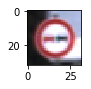

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

## Prints a random image with its label
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

#### Histogram of the whole dataset

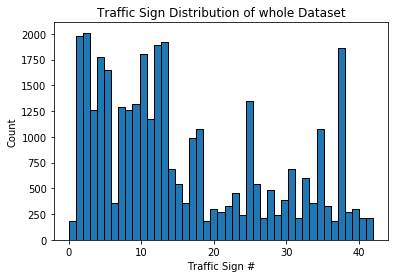

In [6]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(y_train, n_classes, edgecolor='black')
ax.set_xlabel('Traffic Sign #')
ax.set_ylabel('Count')
ax.set_title(r'Traffic Sign Distribution of whole Dataset')
plt.show()

In [7]:
# Count of each label class
y_train_count = np.array(np.stack([n, range(len(n))], axis = 1), dtype=np.int32)

# Sorted label counts
y_train_index = np.lexsort((y_train_count[:,1], y_train_count[:,0]))
y_train_sorted = y_train_count[y_train_index]
#y_train_sorted[y_train_sorted[:,0] < 900] # images with less than 900 examples
print("[Count, Label]")
print(y_train_sorted)

[Count, Label]
[[ 180    0]
 [ 180   19]
 [ 180   37]
 [ 210   27]
 [ 210   32]
 [ 210   41]
 [ 210   42]
 [ 240   24]
 [ 240   29]
 [ 270   21]
 [ 270   39]
 [ 300   20]
 [ 300   40]
 [ 330   22]
 [ 330   36]
 [ 360    6]
 [ 360   16]
 [ 360   34]
 [ 390   30]
 [ 450   23]
 [ 480   28]
 [ 540   15]
 [ 540   26]
 [ 599   33]
 [ 690   14]
 [ 690   31]
 [ 990   17]
 [1080   18]
 [1080   35]
 [1170   11]
 [1260    3]
 [1260    8]
 [1290    7]
 [1320    9]
 [1350   25]
 [1650    5]
 [1770    4]
 [1800   10]
 [1860   38]
 [1890   12]
 [1920   13]
 [1980    1]
 [2010    2]]


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

# Normalize data and apply histogram equalization
def pre_process(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    #image = (image - 127.5) / 127.5
    image = image / 255.0 - 0.5 # scale pixels between -0.5 and 0.5
    return image

if not pre_processed:
    X_train = np.array([pre_process(X_train[i]) for i in range(len(X_train))], dtype=np.float32)
    X_test = np.array([pre_process(X_test[i]) for i in range(len(X_test))], dtype=np.float32)
    X_valid = np.array([pre_process(X_valid[i]) for i in range(len(X_valid))], dtype=np.float32)
    print("Pre-processed images for: X_train, X_test and X_valid")
    pre_processed = True
    
print("Training dataset: min = {:.3f}, mean = {:.3f}, max = {:.3f}".format(np.min(X_train), np.mean(X_train), np.max(X_train)))

Pre-processed images for: X_train, X_test and X_valid
Training dataset: min = -0.500, mean = 0.016, max = 0.500


### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

'''
Network Model (8 weighted layers):
    input: 32x32x3
    5x5x32 conv: output = 28x28x32
    dropout
    5x5x64 conv: output = 24x24x64
    dropout
    2x2 maxpool: output = 12x12x64
    5x5x128 conv: output = 8x8x128
    dropout
    5x5x256 conv: output = 4x4x256
    dropout
    fully connected layer: output = 1024
    fully connected layer: output = 256
    fully connected layer: output = 43
'''
def ConvNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'w_conv_1': tf.Variable(tf.truncated_normal([5, 5, 3, 32], mean = mu, stddev = sigma)),
        'w_conv_2': tf.Variable(tf.truncated_normal([5, 5, 32, 64], mean = mu, stddev = sigma)),
        'w_conv_4': tf.Variable(tf.truncated_normal([5, 5, 64, 128], mean = mu, stddev = sigma)),
        'w_conv_5': tf.Variable(tf.truncated_normal([5, 5, 128, 256], mean = mu, stddev = sigma)),
        'w_fc_6': tf.Variable(tf.truncated_normal([4*4*256, 1024], mean = mu, stddev = sigma)),
        'w_fc_7': tf.Variable(tf.truncated_normal([1024, 256], mean = mu, stddev = sigma)),
        'w_fc_8': tf.Variable(tf.truncated_normal([256, 43], mean = mu, stddev = sigma))
    }
    
    biases = {
        'b_conv_1': tf.Variable(tf.zeros(32)),
        'b_conv_2': tf.Variable(tf.zeros(64)),
        'b_conv_4': tf.Variable(tf.zeros(128)),
        'b_conv_5': tf.Variable(tf.zeros(256)),
        'b_fc_6': tf.Variable(tf.zeros(1024)),
        'b_fc_7': tf.Variable(tf.zeros(256)),
        'b_fc_8': tf.Variable(tf.zeros(43))
    } 
        
    '''
    Notes from hyperparameter tuning:
    
    1) Dropout before output layer: validation accuracy 0.976
    EPOCHS = 30
    BATCH_SIZE = 128
    rate = 0.001
    keep_prob = 0.6

    2) Dropout before fully connected layers: validation accuracy 0.981
    EPOCHS = 30
    BATCH_SIZE = 128
    rate = 0.001
    keep_prob = 0.6

    3) Dropout after each conv layer, keep prob 0.75: validation accuracy 0.973
    EPOCHS = 30
    BATCH_SIZE = 128
    rate = 0.001
    keep_prob = 0.75
    
    4) Dropout after each conv layer, keep prob 0.5: validation accuracy 0.968
    EPOCHS = 30
    BATCH_SIZE = 128
    rate = 0.001
    keep_prob = 0.5
    
    5) Dropout after each conv layer, keep prob 0.5, learning rate 0.0005: validation accuracy 0.987
    EPOCHS = 100
    BATCH_SIZE = 128
    rate = 0.0005
    keep_prob = 0.5
    
    6) Same as 5 with histogram equalization in pre-processing: validation accuracy 0.990
    EPOCHS = 100
    BATCH_SIZE = 128
    rate = 0.0005
    keep_prob = 0.5
    
    7) Same as 6 with input scale from -0.5 to 0.5 (instead of 0 to 1): validation accuracy 0.991
    EPOCHS = 100
    BATCH_SIZE = 128
    rate = 0.0005
    keep_prob = 0.5
    
    8) Same as 7 with learning rate 0.0001 and 200 epochs: validation accuracy 0.991 (more stable than 7)
    EPOCHS = 200
    BATCH_SIZE = 128
    rate = 0.0001
    keep_prob = 0.5
    
    9) Final configuration: same as 8 except with 500 epochs: validation accuracy 0.995
    EPOCHS = 500
    BATCH_SIZE = 128
    rate = 0.0001
    keep_prob = 0.5
    '''
    
    # Layer 1: 5x5x32 conv, stide 1, VALID
    # Input = 32x32x3, output = 28x28x32
    network = tf.nn.conv2d(input = x, filter = weights['w_conv_1'], strides = [1,1,1,1], padding = 'VALID')
    network = tf.nn.bias_add(network, biases['b_conv_1'])
    network = tf.nn.relu(network)
    
    # Dropout
    network = tf.nn.dropout(network, dropout)
    
    # Layer 2: 5x5x64 conv, stide 1, VALID
    # Input = 28x28x32, output = 24x24x64
    network = tf.nn.conv2d(input = network, filter = weights['w_conv_2'], strides = [1,1,1,1], padding = 'VALID')
    network = tf.nn.bias_add(network, biases['b_conv_2'])
    network = tf.nn.relu(network)
    
    # Dropout
    network = tf.nn.dropout(network, dropout)
    
    # Layer 3: 2x2 maxpool, stride 2, VALID
    # Input = 24x24x64, output = 12x12x64
    network = tf.nn.max_pool(value = network, ksize = [1,2,2,1], strides=[1,2,2,1], padding = 'VALID')
    
    # Layer 4: 5x5x128 conv, stide 1, VALID
    # Input = 12x12x64, output = 8x8x128
    network = tf.nn.conv2d(input = network, filter = weights['w_conv_4'], strides = [1,1,1,1], padding = 'VALID')
    network = tf.nn.bias_add(network, biases['b_conv_4'])
    network = tf.nn.relu(network)
    
    # Dropout
    network = tf.nn.dropout(network, dropout)
    
    # Layer 5: 5x5x256 conv, stide 1, VALID
    # Input = 8x8x128, output = 4x4x256
    network = tf.nn.conv2d(input = network, filter = weights['w_conv_5'], strides = [1,1,1,1], padding = 'VALID')
    network = tf.nn.bias_add(network, biases['b_conv_5'])
    network = tf.nn.relu(network)
    
    # Dropout
    network = tf.nn.dropout(network, dropout)
    
    # Flatten
    # Input = 4x4x256, output = 4096
    network = flatten(network)
    
    # Layer 6: fully connected
    # Input = 4096, output = 1024
    network = tf.add(tf.matmul(network, weights['w_fc_6']), biases['b_fc_6'])
    network = tf.nn.relu(network)
    
    # Layer 7: fully connected
    # Input = 1024, output = 256
    network = tf.add(tf.matmul(network, weights['w_fc_7']), biases['b_fc_7'])
    network = tf.nn.relu(network)
    
    # Layer 8: fully connected, output layer
    # Input = 256, output = 43 (logits)
    network = tf.add(tf.matmul(network, weights['w_fc_8']), biases['b_fc_8'])
    
    return network

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout = tf.placeholder(tf.float32)

### Training Pipeline

In [11]:
logits = ConvNet(x, dropout)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Evaluation Pipeline

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout: keep_prob})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_location + 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.066

EPOCH 2 ...
Validation Accuracy = 0.060

EPOCH 3 ...
Validation Accuracy = 0.056

EPOCH 4 ...
Validation Accuracy = 0.052

EPOCH 5 ...
Validation Accuracy = 0.050

EPOCH 6 ...
Validation Accuracy = 0.053

EPOCH 7 ...
Validation Accuracy = 0.072

EPOCH 8 ...
Validation Accuracy = 0.058

EPOCH 9 ...
Validation Accuracy = 0.054

EPOCH 10 ...
Validation Accuracy = 0.062

EPOCH 11 ...
Validation Accuracy = 0.071

EPOCH 12 ...
Validation Accuracy = 0.082

EPOCH 13 ...
Validation Accuracy = 0.094

EPOCH 14 ...
Validation Accuracy = 0.105

EPOCH 15 ...
Validation Accuracy = 0.117

EPOCH 16 ...
Validation Accuracy = 0.143

EPOCH 17 ...
Validation Accuracy = 0.203

EPOCH 18 ...
Validation Accuracy = 0.243

EPOCH 19 ...
Validation Accuracy = 0.319

EPOCH 20 ...
Validation Accuracy = 0.334

EPOCH 21 ...
Validation Accuracy = 0.355

EPOCH 22 ...
Validation Accuracy = 0.410

EPOCH 23 ...
Validation Accuracy = 0.449

EPOCH 24 ...
Validation Accura

EPOCH 194 ...
Validation Accuracy = 0.993

EPOCH 195 ...
Validation Accuracy = 0.994

EPOCH 196 ...
Validation Accuracy = 0.993

EPOCH 197 ...
Validation Accuracy = 0.993

EPOCH 198 ...
Validation Accuracy = 0.993

EPOCH 199 ...
Validation Accuracy = 0.994

EPOCH 200 ...
Validation Accuracy = 0.993

EPOCH 201 ...
Validation Accuracy = 0.993

EPOCH 202 ...
Validation Accuracy = 0.993

EPOCH 203 ...
Validation Accuracy = 0.992

EPOCH 204 ...
Validation Accuracy = 0.993

EPOCH 205 ...
Validation Accuracy = 0.993

EPOCH 206 ...
Validation Accuracy = 0.993

EPOCH 207 ...
Validation Accuracy = 0.993

EPOCH 208 ...
Validation Accuracy = 0.994

EPOCH 209 ...
Validation Accuracy = 0.994

EPOCH 210 ...
Validation Accuracy = 0.994

EPOCH 211 ...
Validation Accuracy = 0.992

EPOCH 212 ...
Validation Accuracy = 0.993

EPOCH 213 ...
Validation Accuracy = 0.994

EPOCH 214 ...
Validation Accuracy = 0.994

EPOCH 215 ...
Validation Accuracy = 0.992

EPOCH 216 ...
Validation Accuracy = 0.993

EPOCH 217 .

EPOCH 385 ...
Validation Accuracy = 0.994

EPOCH 386 ...
Validation Accuracy = 0.993

EPOCH 387 ...
Validation Accuracy = 0.995

EPOCH 388 ...
Validation Accuracy = 0.993

EPOCH 389 ...
Validation Accuracy = 0.994

EPOCH 390 ...
Validation Accuracy = 0.995

EPOCH 391 ...
Validation Accuracy = 0.995

EPOCH 392 ...
Validation Accuracy = 0.994

EPOCH 393 ...
Validation Accuracy = 0.995

EPOCH 394 ...
Validation Accuracy = 0.993

EPOCH 395 ...
Validation Accuracy = 0.994

EPOCH 396 ...
Validation Accuracy = 0.995

EPOCH 397 ...
Validation Accuracy = 0.994

EPOCH 398 ...
Validation Accuracy = 0.994

EPOCH 399 ...
Validation Accuracy = 0.992

EPOCH 400 ...
Validation Accuracy = 0.994

EPOCH 401 ...
Validation Accuracy = 0.995

EPOCH 402 ...
Validation Accuracy = 0.994

EPOCH 403 ...
Validation Accuracy = 0.991

EPOCH 404 ...
Validation Accuracy = 0.993

EPOCH 405 ...
Validation Accuracy = 0.993

EPOCH 406 ...
Validation Accuracy = 0.992

EPOCH 407 ...
Validation Accuracy = 0.992

EPOCH 408 .

### Evaluation on Test Data

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(save_location))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.979


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Find all files in ./new_traffic_signs/ directory
image_files = [f for f in listdir("./new_traffic_signs/") if isfile(join("./new_traffic_signs/", f))]
print(image_files)

['002_25.jpg', '005_13.png', '001_27.jpg', '004_11.jpg', '003_18.jpg']


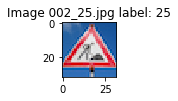

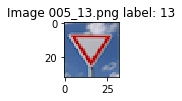

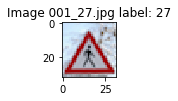

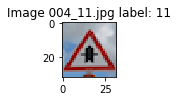

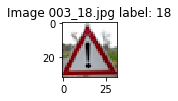

In [16]:
# Read each image, plot and store in X_new
# Filename is formated as xxx_yy.jpg where xxx is the file number and yy is the label
# Extract label from file name into y_new
X_new = []
y_new = []
for file in image_files:
    image = cv2.imread("./new_traffic_signs/" + file)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    X_new.append(image)
    find_index = file.find('_') + 1
    image_label = int(file[find_index:-4])
    y_new.append(image_label)
    plt.figure(figsize=(1,1))
    plt.title("Image {} label: {}".format(file, image_label))
    plt.imshow(image)

In [17]:
## X_new and y_new contain the images and labels plot above
X_new = np.array(X_new)
y_new = np.array(y_new)
print("X_new:")
print(X_new.shape)
print("\ny_new:")
print(y_new.shape)

X_new:
(5, 32, 32, 3)

y_new:
(5,)


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-process X_new
if not new_pre_processed:
    X_new = np.array([pre_process(X_new[i]) for i in range(len(X_new))], dtype=np.float32)
    print("Pre-processed images for: X_train")
    new_pre_processed = True

Pre-processed images for: X_train


In [19]:
# Make predictions with X_new images as network input
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(save_location))
    y_pred = sess.run(tf.argmax(input=logits, axis=1), feed_dict={x: X_new, dropout: 1.0})

In [20]:
num_examples = len(y_new)
for index in range(num_examples):
    print("For image {} the model predicted {}, correct prediction is {}".format(image_files[index], y_pred[index], y_new[index]))

For image 002_25.jpg the model predicted 25, correct prediction is 25
For image 005_13.png the model predicted 13, correct prediction is 13
For image 001_27.jpg the model predicted 11, correct prediction is 27
For image 004_11.jpg the model predicted 11, correct prediction is 11
For image 003_18.jpg the model predicted 18, correct prediction is 18


### Analyze Performance

In [21]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy = 0.0
for index in range(num_examples):
    if y_pred[index] == y_new[index]:
        accuracy += 1.0
accuracy /= num_examples
print("The model's accuracy on new images is {}%".format(accuracy*100))

The model's accuracy on new images is 80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_pred_top5 = tf.nn.top_k(tf.nn.softmax(logits), k=5)
#softmax_pred = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(save_location))
    y_pred_top5 = sess.run(softmax_pred_top5, feed_dict={x: X_new, dropout: 1.0})

In [23]:
print("Top 5 softmax values for each image:")
for index in range(num_examples):
    print("\nFor image {} (correct label {}):".format(image_files[index], y_new[index]))
    for index2 in range(5):
        print("Label {}: {}".format(y_pred_top5[1][index][index2], y_pred_top5[0][index][index2]))

Top 5 softmax values for each image:

For image 002_25.jpg (correct label 25):
Label 25: 0.9997757077217102
Label 30: 0.00020635206601582468
Label 26: 9.754183338372968e-06
Label 8: 3.1525062240689294e-06
Label 11: 2.1258786091493675e-06

For image 005_13.png (correct label 13):
Label 13: 1.0
Label 0: 0.0
Label 1: 0.0
Label 2: 0.0
Label 3: 0.0

For image 001_27.jpg (correct label 27):
Label 11: 0.9993417859077454
Label 27: 0.0006467330968007445
Label 19: 7.211038337118225e-06
Label 21: 1.8007406197284581e-06
Label 30: 1.108314904740837e-06

For image 004_11.jpg (correct label 11):
Label 11: 1.0
Label 30: 1.1304750469065539e-09
Label 27: 1.0548280304778501e-10
Label 21: 4.9346629213409265e-12
Label 16: 3.377056230144393e-12

For image 003_18.jpg (correct label 18):
Label 18: 1.0
Label 27: 2.598853221513764e-08
Label 11: 3.2409860385718137e-13
Label 19: 1.4729127070572598e-14
Label 10: 6.301293558630698e-16


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")